In [226]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [227]:
# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [228]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [229]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [234]:
# Print out the Name value counts
name_counts = charity_df.NAME.value_counts()
name_counts.head(50)

PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCIATION

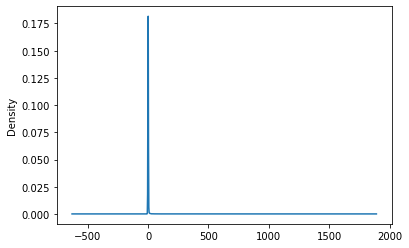

In [235]:
# Visualize the name value counts
name_counts.plot.density()

In [236]:
# Determine which name values to replace
replace_name = list(name_counts[name_counts < 300].index)

# Replace in DataFrame
for NAME in replace_name:
    charity_df.NAME = charity_df.NAME.replace(NAME,"Other")


# Check to make sure binning was successful
charity_df.NAME.value_counts()

Other                                              29662
PARENT BOOSTER USA INC                              1260
TOPS CLUB INC                                        765
UNITED STATES BOWLING CONGRESS INC                   700
WASHINGTON STATE UNIVERSITY                          492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC      408
PTA TEXAS CONGRESS                                   368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC        331
ALPHA PHI SIGMA                                      313
Name: NAME, dtype: int64

In [237]:
# Print out the Classification value counts
classification_counts = charity_df.CLASSIFICATION.value_counts()
classification_counts.head(30)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1278       10
C1238       10
C1237        9
Name: CLASSIFICATION, dtype: int64

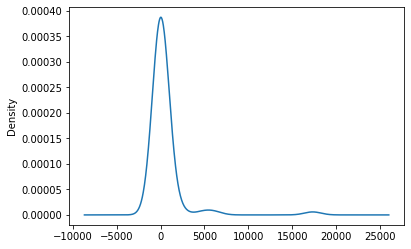

In [238]:
# Visualize the Classification value counts
classification_counts.plot.density()

In [239]:
# Determine which classification values to replace
replace_classification = list(classification_counts[classification_counts < 150].index)

# Replace in DataFrame
for CLASSIFICATION in replace_classification:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(CLASSIFICATION,"Other")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

In [240]:
# Print out the application type value counts
applicationtype_counts = charity_df.APPLICATION_TYPE.value_counts()
applicationtype_counts.head(30)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

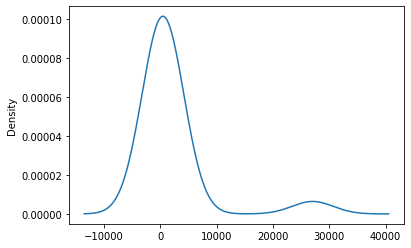

In [241]:
# Visualize the application type value counts
applicationtype_counts.plot.density()

In [242]:
# Determine which application type values to replace
replace_applicationtype = list(applicationtype_counts[applicationtype_counts < 100].index)

# Replace in DataFrame
for APPLICATION_TYPE in replace_applicationtype:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(APPLICATION_TYPE,"Other")


# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [243]:
# Print out the income amount type value counts
incomeamount_counts = charity_df.INCOME_AMT.value_counts()
incomeamount_counts.head(30)

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [244]:
# Visualize the income amount value counts
#incomeamount_counts.plot.density()

In [245]:
# Determine which income amount values to replace
#replace_incomeamt = list(incomeamount_counts[incomeamount_counts < 500].index)

# Replace in DataFrame
#for INCOME_AMT in replace_incomeamt:
#    charity_df.INCOME_AMT = charity_df.INCOME_AMT.replace(INCOME_AMT,"Greater than 5M")


# Check to make sure binning was successful
#charity_df.INCOME_AMT.value_counts()

In [246]:
charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,Other,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,Other,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,Other,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,Other,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,Other,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,Other,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,Other,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,Other,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,Other,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [247]:
charity_df.dropna()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,Other,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,Other,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,Other,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,Other,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,Other,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,Other,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,Other,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,Other,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,Other,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [248]:
charity_df = charity_df.drop(columns=['EIN', 'STATUS'])

In [249]:
charity_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,Other,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,Other,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,Other,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,Other,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,Other,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [250]:
# Generate our categorical variable list
charity_cat1 = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [251]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
charity_encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat1]))

# Add the encoded variable names to the DataFrame
charity_encode_df.columns = enc.get_feature_names(charity_cat1)
charity_encode_df.head()

,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_Other,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [252]:
# Merge one-hot encoded features and drop the originals
charity_df = charity_df.merge(charity_encode_df,left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat1,1)
charity_df.head()

,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [253]:
#charity_df = pd.get_dummies(charity_df, columns=["IS_SUCCESSFUL"])
#charity_df.head()

In [254]:
# Split our preprocessed data into our features and target arrays
#y = charity_df["IS_SUCCESSFUL_1"].values
#X = charity_df.drop(["IS_SUCCESSFUL_1", "IS_SUCCESSFUL_0"],1).values
y = charity_df["IS_SUCCESSFUL"].values
X = charity_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [255]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [256]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [257]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=110, activation="relu", input_dim=55))

In [258]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [259]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 110)               6160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 111       
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [260]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [263]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 78us/sample - loss: 0.5076 - accuracy: 0.7486
Epoch 2/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.5075 - accuracy: 0.7499
Epoch 3/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5080 - accuracy: 0.7502
Epoch 4/100
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5080 - accuracy: 0.7482
Epoch 5/100
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5074 - accuracy: 0.7498
Epoch 6/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5082 - accuracy: 0.7486
Epoch 7/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.5077 - accuracy: 0.7488
Epoch 8/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5074 - accuracy: 0.7472
Epoch 9/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.5069 - accuracy: 0.7498
Epoch

25724/25724 [==============================] - 2s 93us/sample - loss: 0.5039 - accuracy: 0.7512
Epoch 77/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5040 - accuracy: 0.7516
Epoch 78/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5040 - accuracy: 0.7517
Epoch 79/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5040 - accuracy: 0.7515
Epoch 80/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.5040 - accuracy: 0.7522
Epoch 81/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.5033 - accuracy: 0.7512
Epoch 82/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5040 - accuracy: 0.7509
Epoch 83/100
25724/25724 [==============================] - 3s 104us/sample - loss: 0.5036 - accuracy: 0.7510
Epoch 84/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5035 - accuracy: 0.7526
Epoch 85/100
25724/25724 [=====

In [264]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5223 - accuracy: 0.7396
Loss: 0.5223437584558659, Accuracy: 0.7395918369293213
